## Multiple Linear Regression

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl as pxl
%matplotlib inline 
# It is a special/magic command in Jupyter Notebooks that allows the graphs to be displayed inline and not in a separate window

In [3]:
# Checking the file encoding of the dataset using chardet
import chardet as ch
with open(r'C:\Users\pc\Desktop\Datasets\price_index_dataset.csv', 'rb') as f:
    result = ch.detect(f.read())
    print(f"File Encoding is: {result['encoding']}")


File Encoding is: ascii


In [4]:
# Importing the datset and converting it into a dataframe
df = pd.read_csv(r'C:\Users\pc\Desktop\Datasets\price_index_dataset.csv', encoding='ascii')
df.head()

,Income,Interest_Rate,Employment_Rate,GDP_Growth,Price_Index
0,54967.141530,3.584629,95.715575,2.585502,210.521012
1,48617.356988,4.579355,96.121569,2.719909,217.288582
2,56476.885381,4.657285,97.166102,3.373647,232.505390
3,65230.298564,4.197723,97.107604,3.305185,237.529505
4,47658.466253,4.838714,92.244661,2.989549,211.507576


In [5]:
# Now cchecking the datatypes and null values in the dataset and columns names and 5 number summary as well
df.info(), print('\n'), df.isnull().sum(),print('\n\n'), df.columns,print('\n\n'), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Income           100 non-null    float64
 1   Interest_Rate    100 non-null    float64
 2   Employment_Rate  100 non-null    float64
 3   GDP_Growth       100 non-null    float64
 4   Price_Index      100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB










(None,
 None,
 Income             0
 Interest_Rate      0
 Employment_Rate    0
 GDP_Growth         0
 Price_Index        0
 dtype: int64,
 None,
 Index(['Income', 'Interest_Rate', 'Employment_Rate', 'GDP_Growth',
        'Price_Index'],
       dtype='object'),
 None,
              Income  Interest_Rate  Employment_Rate  GDP_Growth  Price_Index
 count    100.000000     100.000000       100.000000  100.000000   100.000000
 mean   48961.534826       5.022305        95.129793    3.053420   221.913951
 std     9081.684280       0.953669         2.168566    0.442051    12.135535
 min    23802.548959       3.081229        88.517465    1.938052   194.996207
 25%    43990.943295       4.194339        93.689113    2.716490   215.534988
 50%    48730.437082       5.084107        95.195391    3.025079   220.489061
 75%    54059.520520       5.538170        96.408875    3.342000   226.896522
 max    68522.781845       7.720169       102.705463    4.094901   259.898313)

(                   Income  Interest_Rate  Employment_Rate  GDP_Growth  \
 Income           1.000000      -0.136422         0.190840   -0.170227   
 Interest_Rate   -0.136422       1.000000        -0.036632   -0.017613   
 Employment_Rate  0.190840      -0.036632         1.000000   -0.000259   
 GDP_Growth      -0.170227      -0.017613        -0.000259    1.000000   
 Price_Index      0.308085      -0.018001         0.340085    0.308221   
 
                  Price_Index  
 Income              0.308085  
 Interest_Rate      -0.018001  
 Employment_Rate     0.340085  
 GDP_Growth          0.308221  
 Price_Index         1.000000  ,
 <Axes: >,
 (array([0.5, 1.5, 2.5, 3.5, 4.5]),
  [Text(0.5, 0, 'Income'),
   Text(1.5, 0, 'Interest_Rate'),
   Text(2.5, 0, 'Employment_Rate'),
   Text(3.5, 0, 'GDP_Growth'),
   Text(4.5, 0, 'Price_Index')]))

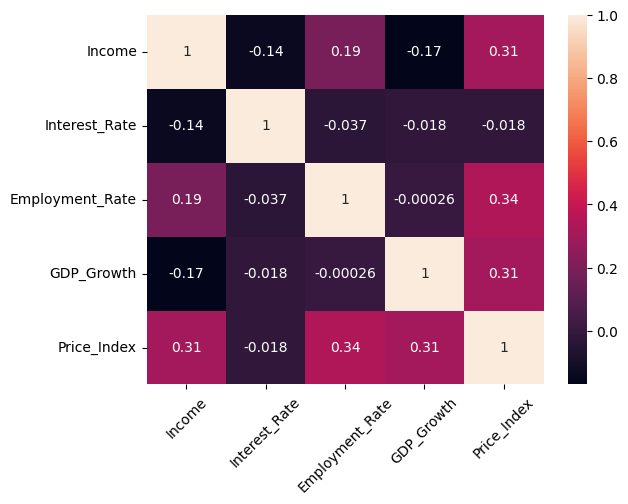

In [6]:
# Now checking the correlation between the columns int eh dataset
df.corr(),sns.heatmap(df.corr(), annot=True), plt.xticks(rotation=45)

# Formula for calculating the index price is w.r.t to interest rate and employment rate
# The formula is as follows:
# Price Index = Interest Rate * Employment Rate 


(   Interest_Rate  Employment_Rate  Price_Index
 0       3.584629        95.715575   210.521012
 1       4.579355        96.121569   217.288582
 2       4.657285        97.166102   232.505390
 3       4.197723        97.107604   237.529505
 4       4.838714        92.244661   211.507576,
 <seaborn.axisgrid.PairGrid at 0x1be864776d0>)

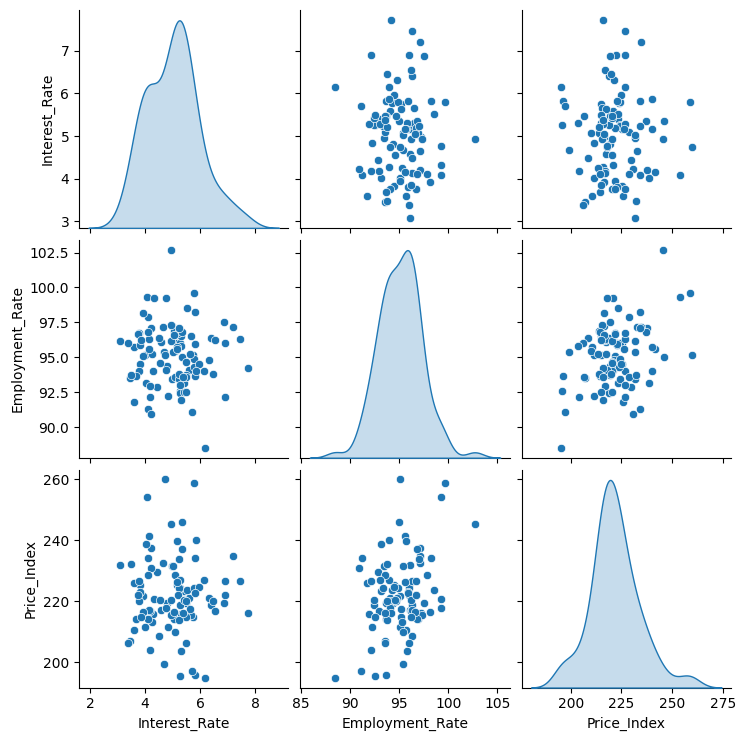

In [7]:
# Now dropping the unnecessary columns but always do this in a copy of the original dataset
df_copy = df.drop(columns=['Income', 'GDP_Growth'])
df_copy.head(),sns.pairplot(data=df_copy, diag_kind='kde')

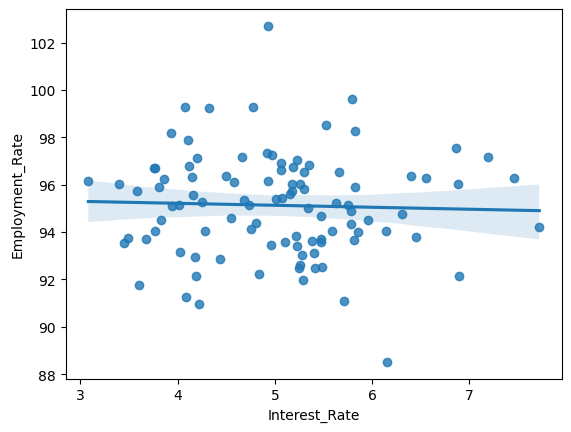

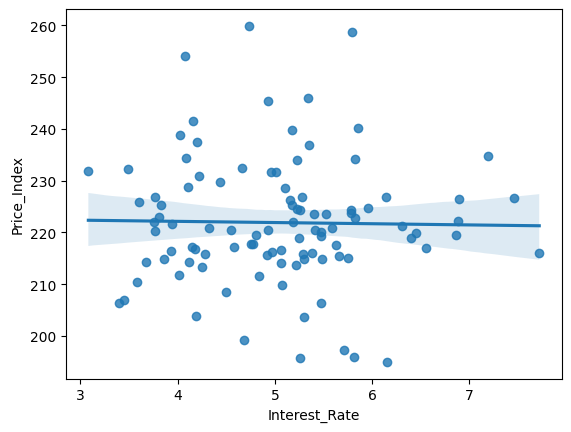

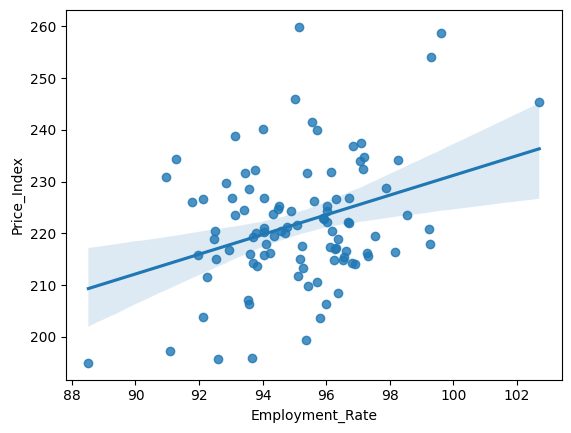

In [8]:
# we can also see the line of best fit using sns.regplot
sns.regplot(x=df_copy['Interest_Rate'], y=df_copy['Employment_Rate'])
plt.show()
sns.regplot(x=df_copy['Interest_Rate'], y=df_copy['Price_Index'])
plt.show()
sns.regplot(x=df_copy['Employment_Rate'], y=df_copy['Price_Index'])
plt.show()

In [9]:
# After dta cleaning and EDA we can move to the modeling part of the dataset
# First assign the target variables and the features
x = df_copy.iloc[:,:-1]
y = df_copy.iloc[:,-1]
# Here the dataset has 2 features and 1 target variable
x.head(), y.head()

(   Interest_Rate  Employment_Rate
 0       3.584629        95.715575
 1       4.579355        96.121569
 2       4.657285        97.166102
 3       4.197723        97.107604
 4       4.838714        92.244661,
 0    210.521012
 1    217.288582
 2    232.505390
 3    237.529505
 4    211.507576
 Name: Price_Index, dtype: float64)

In [10]:
# Now splitting the assigned variables into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=13)


In [11]:
# Now scaling the data using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, x_test.shape, y_train.shape, y_test.head()


((75, 2),
 (25, 2),
 (75,),
 37    199.326080
 62    194.996207
 83    214.953927
 14    219.489712
 43    222.021993
 Name: Price_Index, dtype: float64)

In [12]:
# Creating a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# To get the cross validation scores to see the model is not overfitting
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(model,x_train, y_train, scoring='neg_mean_squared_error',cv=3)
validation_score, np.mean(validation_score)

(array([-111.06554218, -240.87650027,  -82.55433552]),
 np.float64(-144.83212598672017))

In [14]:
# Getting the coefficient and intercept
model.coef_, model.intercept_
print(f'The coefficients are : {model.coef_} and the intercept is : {model.intercept_}')

The coefficients are : [-0.22248467  1.79297933] and the intercept is : 222.77379342426855


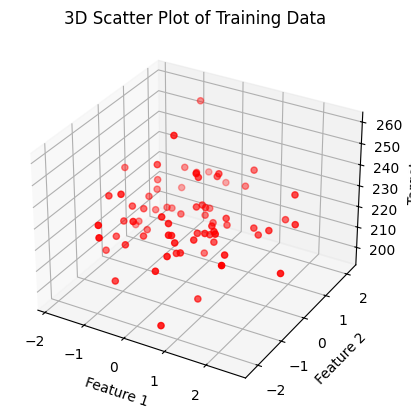

In [15]:
# Now lets see how the model has has been created
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_train[:, 0], x_train[:, 1], y_train, color='red')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
plt.title("3D Scatter Plot of Training Data")
plt.show()


In [16]:
y_pred = model.predict(x_test)

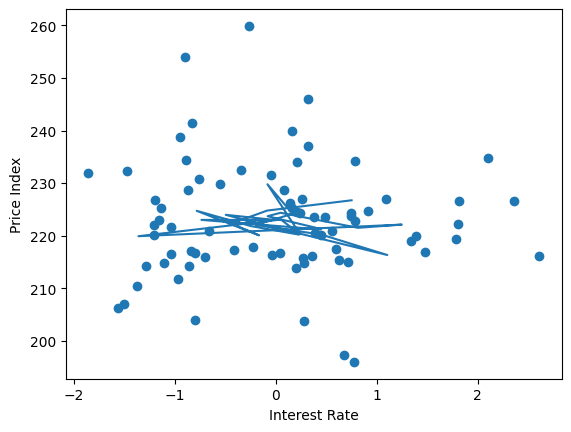

In [23]:
# Now to see how the model has trained with the training data
plt.scatter(x=x_train[:,0], y=y_train)
plt.plot(x_test[:,0], y_pred)
plt.xlabel('Interest Rate')
plt.ylabel('Price Index')
plt.show()

In [24]:
# Lets calculate the different metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
print(f'Mean squared error : {mean_squared_error(y_test, y_pred)}')
print(f'Mean absolute error : {mean_absolute_error(y_test, y_pred)}')
print(f'Root mean squared error : {root_mean_squared_error(y_test, y_pred)}')
print(f'The r2 score : {r2_score(y_test, y_pred)}')

Mean squared error : 183.07327420772998
Mean absolute error : 10.708354263704683
Root mean squared error : 13.53045728006744
The r2 score : 0.1351714039939219


In [ ]:
# Since the model r2 score is very low i reject the model